In [1]:
# Importing pandas library which is used for data manipulation and analysis
import pandas as pd

In [2]:
# Filepath for the users dataset
users_filepath = '/Users/archits/Downloads/BX-Users.csv'

In [3]:
# Reading and Loading the users dataset
users = pd.read_csv(
    users_filepath, # File path of the 'users' dataset
    encoding="latin-1", # Specifying the character encoding as 'latin-1' to handle special characters
    on_bad_lines='skip', # Skip lines with errors (such as malformed rows) instead of raising an error
    low_memory=False # Disable memory optimization for large files (use all available memory to process)
)

In [4]:
# Checking first few rows of the dataset
print(users.head())

  user_id                            Location   Age
0       1                  nyc, new york, usa   NaN
1       2           stockton, california, usa  18.0
2       3     moscow, yukon territory, russia   NaN
3       4           porto, v.n.gaia, portugal  17.0
4       5  farnborough, hants, united kingdom   NaN


In [5]:
# Checking data types of each column in the users dataset
print(users.dtypes)

user_id      object
Location     object
Age         float64
dtype: object


In [6]:
# Converting columns to appropriate data types
users['user_id'] = pd.to_numeric(users['user_id'], errors='coerce').astype('Int64') # type of error handling -> it substitutes invalid entries with NaN 
users['Location'] = users['Location'].astype('string') 
users['Age'] = pd.to_numeric(users['Age'], errors='coerce').fillna(0).astype('Int64') 

In [7]:
# Displaying the updated data types
print("\nUpdated data types:")
print(users.dtypes)


Updated data types:
user_id              Int64
Location    string[python]
Age                  Int64
dtype: object


In [8]:
# Checking first few rows after updating
print(users.head())

   user_id                            Location  Age
0        1                  nyc, new york, usa    0
1        2           stockton, california, usa   18
2        3     moscow, yukon territory, russia    0
3        4           porto, v.n.gaia, portugal   17
4        5  farnborough, hants, united kingdom    0


In [9]:
# users dataset after updating
users

,user_id,Location,Age
0,1,"nyc, new york, usa",0
1,2,"stockton, california, usa",18
2,3,"moscow, yukon territory, russia",0
3,4,"porto, v.n.gaia, portugal",17
4,5,"farnborough, hants, united kingdom",0
...,...,...,...
278854,278854,"portland, oregon, usa",0
278855,278855,"tacoma, washington, united kingdom",50
278856,278856,"brampton, ontario, canada",0
278857,278857,"knoxville, tennessee, usa",0


In [10]:
# Data Cleaning 
## Function to rename columns dynamically
def rename_columns(columns):
    renamed_columns = []
    for col in columns:
        # Replacing underscores with spaces
        new_col = col.replace('_', ' ')
        # Capitalize the first letter of each word
        new_col = new_col.title()      
        renamed_columns.append(new_col)
    return renamed_columns

In [11]:
# Applying the renaming function to the columns
users.columns = rename_columns(users.columns)

In [12]:
# Displaying the first few rows of the updated dataset
print("\nFirst few rows of the updated dataset:")
print(users.head())


First few rows of the updated dataset:
   User Id                            Location  Age
0        1                  nyc, new york, usa    0
1        2           stockton, california, usa   18
2        3     moscow, yukon territory, russia    0
3        4           porto, v.n.gaia, portugal   17
4        5  farnborough, hants, united kingdom    0


In [13]:
# users dataset after first round of data cleaning 
users

,User Id,Location,Age
0,1,"nyc, new york, usa",0
1,2,"stockton, california, usa",18
2,3,"moscow, yukon territory, russia",0
3,4,"porto, v.n.gaia, portugal",17
4,5,"farnborough, hants, united kingdom",0
...,...,...,...
278854,278854,"portland, oregon, usa",0
278855,278855,"tacoma, washington, united kingdom",50
278856,278856,"brampton, ontario, canada",0
278857,278857,"knoxville, tennessee, usa",0


In [14]:
# Function to identify uppercase parts in a location string
def identify_uppercase_parts(location):
    # Splitting the location string into individual parts, stripping whitespace, and conversion to lowercase
    parts = [part.strip().lower() for part in location.split(',')]
    # Identification of potential uppercase field in location
    uppercase_candidates = []
    for part in parts:
        # Conditions
        is_short = len(part) <= 3 # Checking if the part is short
        is_abbr = part.isalpha() and part.isupper() # Checking if the part is an abbrevation
        is_country_like = len(part) >= 2 and part.isalpha() # Checking if the part looks like a country
        # Check if the part meets any of the condition
        if is_short or is_abbr or is_country_like:
            uppercase_candidates.append(part)
    # Returning the list of uppercase candidates
    return uppercase_candidates

In [15]:
# Library used for working with large, multi-dimensional arrays and matrices 
import numpy as np # also performing mathematical operations on the arrays

In [16]:
# Function to clean location data
def loc_data_cleaning(location):
    # Handle NaN values explicitly -> return Not a number if the Location is NaN
    if pd.isna(location):
        return np.nan
    # Splitting the location string into individual parts
    location_parts = location.split(',')
    cleaned_parts = []
    # Cleaning and formatting each part
    for part in location_parts:
        cleaned_part = part.strip()
        # Conversion of 'n/a' or 'na' to 'N/A'
        if cleaned_part.lower() in ['n/a', 'na']:
            cleaned_part = 'N/A'
        # Capitalizing parts that are 3 characters or less and all letters
        elif len(cleaned_part) <= 3 and cleaned_part.isalpha():
            cleaned_part = cleaned_part.upper()
        # Title-case all other parts
        else:
            cleaned_part = cleaned_part.title()
        # Adding the cleaned parts to the list
        cleaned_parts.append(cleaned_part)
    # Joining and returning the cleaned parts back into a single string
    return ', '.join(cleaned_parts)

In [17]:
# Applying the cleaning function to the Location column 
users['Location'] = users['Location'].apply(loc_data_cleaning)

In [18]:
# Display the first few rows of the updated dataset
print(users.head())

   User Id                            Location  Age
0        1                  NYC, New York, USA    0
1        2           Stockton, California, USA   18
2        3     Moscow, Yukon Territory, Russia    0
3        4           Porto, V.N.Gaia, Portugal   17
4        5  Farnborough, Hants, United Kingdom    0


In [19]:
# Users dataset after second round of data cleaning 
users

,User Id,Location,Age
0,1,"NYC, New York, USA",0
1,2,"Stockton, California, USA",18
2,3,"Moscow, Yukon Territory, Russia",0
3,4,"Porto, V.N.Gaia, Portugal",17
4,5,"Farnborough, Hants, United Kingdom",0
...,...,...,...
278854,278854,"Portland, Oregon, USA",0
278855,278855,"Tacoma, Washington, United Kingdom",50
278856,278856,"Brampton, Ontario, Canada",0
278857,278857,"Knoxville, Tennessee, USA",0


In [20]:
# Filepath for the books dataset
books_filepath = '/Users/archits/Downloads/BX-Books.csv'

In [21]:
# Reading and loading the books dataset
books = pd.read_csv(
    books_filepath,
    encoding="latin-1",
    on_bad_lines='skip',
    low_memory=False
)

In [22]:
# Displaying initial data types
print("Initial data types:")
print(books.dtypes)

Initial data types:
isbn                   object
book_title             object
book_author            object
year_of_publication    object
publisher              object
dtype: object


In [23]:
# Displaying the first few rows of the books dataset
print("\nFirst few rows of the dataset:")
print(books.head())


First few rows of the dataset:
        isbn                                         book_title  \
0  195153448                                Classical Mythology   
1    2005018                                       Clara Callan   
2   60973129                               Decision in Normandy   
3  374157065  Flu: The Story of the Great Influenza Pandemic...   
4  393045218                             The Mummies of Urumchi   

            book_author year_of_publication                   publisher  
0    Mark P. O. Morford                2002     Oxford University Press  
1  Richard Bruce Wright                2001       HarperFlamingo Canada  
2          Carlo D'Este                1991             HarperPerennial  
3      Gina Bari Kolata                1999        Farrar Straus Giroux  
4       E. J. W. Barber                1999  W. W. Norton &amp; Company  


In [24]:
# Converting books dataset's columns to the appropriate data types
books['isbn'] = books['isbn'].astype('string') 
books['book_title'] = books['book_title'].astype('string')  
books['book_author'] = books['book_author'].astype('string') 
books['year_of_publication'] = pd.to_numeric(books['year_of_publication'], errors='coerce').fillna(0).astype(int) 
books['publisher'] = books['publisher'].astype('string')

In [25]:
# Display the updated data types
print("\nUpdated data types:")
print(books.dtypes)


Updated data types:
isbn                   string[python]
book_title             string[python]
book_author            string[python]
year_of_publication             int64
publisher              string[python]
dtype: object


In [26]:
# Display the first few rows of the books dataset after updating
print("\nFirst few rows of the dataset:")
print(books.head())


First few rows of the dataset:
        isbn                                         book_title  \
0  195153448                                Classical Mythology   
1    2005018                                       Clara Callan   
2   60973129                               Decision in Normandy   
3  374157065  Flu: The Story of the Great Influenza Pandemic...   
4  393045218                             The Mummies of Urumchi   

            book_author  year_of_publication                   publisher  
0    Mark P. O. Morford                 2002     Oxford University Press  
1  Richard Bruce Wright                 2001       HarperFlamingo Canada  
2          Carlo D'Este                 1991             HarperPerennial  
3      Gina Bari Kolata                 1999        Farrar Straus Giroux  
4       E. J. W. Barber                 1999  W. W. Norton &amp; Company  


In [27]:
# books dataset after updating
books

,isbn,book_title,book_author,year_of_publication,publisher
0,195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,2005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,60973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company
...,...,...,...,...,...
271374,440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm)
271375,525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books
271376,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco
271377,192126040,Republic (World's Classics),Plato,1996,Oxford University Press


In [28]:
# Function to rename columns dynamically
def rename_columns(columns):
    renamed_columns = []
    # Defining a set of words that are not to be capitalized - preposition, articles, etc.
    lowercase_words = {'of', 'and', 'in', 'the', 'to', 'for', 'a', 'on', 'by', 'with'}
    # Iteration through each column name
    for col in columns:
        # Replacing underscores with spaces
        new_col = col.replace('_', ' ')
        # Splitting the column name into individual word
        words = new_col.split()
        # Capitalizing the first letter of each word, except for the lowercase words
        for i, word in enumerate(words):
            if i == 0 or i == len(words) - 1 or word.lower() not in lowercase_words:
                words[i] = word.capitalize()
            else:
                words[i] = word.lower() 
        # Rejoining the words into a single string 
        new_col = ' '.join(words)
        if 'isbn' in col.lower():
            new_col = 'ISBN' 
        # Adding renamed column to the list
        renamed_columns.append(new_col)
    # Returning the list of updated columns
    return renamed_columns

In [29]:
# Calling the renaming function for the books dataset 
books.columns = rename_columns(books.columns)

In [30]:
# Displaying updated column names
print("\nUpdated column names:")
print(books.columns)


Updated column names:
Index(['ISBN', 'Book Title', 'Book Author', 'Year of Publication',
       'Publisher'],
      dtype='object')


In [31]:
# books dataset after first round of data cleaning
books

,ISBN,Book Title,Book Author,Year of Publication,Publisher
0,195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,2005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,60973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company
...,...,...,...,...,...
271374,440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm)
271375,525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books
271376,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco
271377,192126040,Republic (World's Classics),Plato,1996,Oxford University Press


In [32]:
import re # module used for pattern matching, searching, replacing, and parsing strings
import unicodedata # module provides functions to work with Unicode characters, such as normalization and character properties

In [33]:
# Clean Publisher Column in the books dataset
books['Publisher'] = books['Publisher'].str.replace('&amp;', '&', regex=False) # replaced ampersand with &
# Normalize Unicode text and add spaces between lowercase and uppercase letters in the 'Publisher' column
books['Publisher'] = books['Publisher'].apply(
    lambda x: re.sub(
        r'([a-z])([A-Z])', # regular expression to match a lowercase letter followed immediatley by an uppercase letter 
        r'\1 \2', # Inserting a space between the lowercase (\1) and uppercase (\2) letters
        unicodedata.normalize('NFKD', x) # Normalize the text using Unicode NFKD normalization
    ) if isinstance(x, str) else x  # Lambda function applies the transformation only if the value is a string
)
# Remove all non-ASCII characters from the text
books['Publisher'] = books['Publisher'].apply(
    lambda text: re.sub(
        r'[^\x00-\x7F]', # Regular expression to match any character outside the ASCII range (0-127) 
        '', # Replace non-ASCII characters with an empty string
        text # Text to process
    ) if isinstance(text, str) else text # Lambda function applies the transformation only if the value is a string
)

In [34]:
# Displaying few rows after second round of data cleaning on the books dataset
books.head(50)

,ISBN,Book Title,Book Author,Year of Publication,Publisher
0,195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,2005018,Clara Callan,Richard Bruce Wright,2001,Harper Flamingo Canada
2,60973129,Decision in Normandy,Carlo D'Este,1991,Harper Perennial
3,374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton & Company
5,399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group
6,425176428,What If?: The World's Foremost Military Histor...,Robert Cowley,2000,Berkley Publishing Group
7,671870432,PLEADING GUILTY,Scott Turow,1993,Audioworks
8,679425608,Under the Black Flag: The Romance and the Real...,David Cordingly,1996,Random House
9,074322678X,Where You'll Find Me: And Other Stories,Ann Beattie,2002,Scribner


In [37]:
## Clean Book Title and Book Author columns in the books dataset
# Defining a set of prepositions and conjunctions to ignore when capitalizing
exceptions = {'of', 'and', 'in', 'on', 'at', 'to', 'with', 'from', 'by', 'about', 'as', 'for', 'but', 'or', 'nor'}
# Defining a function to format text in title case while ignoring exceptions
def format_title_case(text):
    if not isinstance(text, str): 
        return text  # Return the original value if it's not a string
    # Conversion of the text to lowercase and split into words
    words = text.lower().split()
    # Capitalizing the first word and any word not in the exceptions set
    formatted_words = [
        word.capitalize() if i == 0 or word not in exceptions else word
        for i, word in enumerate(words)
    ]
    # Joining the formatted words back into a single string
    return ' '.join(formatted_words)
# Applying the title formatting function to the 'Book Title' and 'Book Author' columns
books['Book Title'] = books['Book Title'].apply(format_title_case)
books['Book Author'] = books['Book Author'].apply(format_title_case)

In [38]:
# Clean the 'Book Author' column by removing non-ASCII characters
books['Book Author'] = books['Book Author'].apply(
    lambda x: ''.join(
        c for c in unicodedata.normalize('NFKD', str(x)) if ord(c) < 128  # Keep only ASCII characters
    ) if isinstance(x, str) else x  # Only process strings
)
# Replace multiple spaces with a single space in the 'Book Author' column
books['Book Author'] = books['Book Author'].apply(
    lambda x: re.sub(r'\s+', ' ', x) if isinstance(x, str) else x  # Replace one or more spaces with a single space
)

In [39]:
# Displaying few rows after third round of data cleaning on the books dataset
books.head(50)

,ISBN,Book Title,Book Author,Year of Publication,Publisher
0,195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,2005018,Clara Callan,Richard Bruce Wright,2001,Harper Flamingo Canada
2,60973129,Decision in Normandy,Carlo D'este,1991,Harper Perennial
3,374157065,Flu: The Story of The Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton & Company
5,399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group
6,425176428,What If?: The World's Foremost Military Histor...,Robert Cowley,2000,Berkley Publishing Group
7,671870432,Pleading Guilty,Scott Turow,1993,Audioworks
8,679425608,Under The Black Flag: The Romance and The Real...,David Cordingly,1996,Random House
9,074322678X,Where You'll Find Me: and Other Stories,Ann Beattie,2002,Scribner


In [40]:
# Group by Author and Year to count the number of books each author has written in each year
author_year_books = books.groupby(['Book Author', 'Year of Publication']).size().reset_index(name='Book Count')

In [36]:
# Displaying number of books each author has written in each year before cleaning Author column
author_year_books

,Book Author,Year of Publication,Book Count
0,"14 : Ensayo)""",0,1
1,"A Hurricane) (Harlequin American Romance, No ...",0,1
2,Created by Francine Pascal (Sweet Valley High...,0,1
3,D. Chiel,1995,1
4,"FriendsÂ¥"" Complete Story Collection""",0,1
...,...,...,...
202055,ï¾?dï¾ï½¶n von Horvï¾ï½¡th,1986,1
202056,ï¾?dï¾ï½¶n von Horvï¾ï½¡th,1988,1
202057,ï¾?ï¾?dï¾?ï¾ï½¶n von Horvath,1999,1
202058,ï¾?ï¾?pictï¾?ï¾ï½¨te,2003,1


In [41]:
# Display the grouped data by Author and Year and after cleaning Author column
print("\nBooks written by each author in each year:")
author_year_books


Books written by each author in each year:


,Book Author,Year of Publication,Book Count
0,'n Sync,1998,1
1,"14 : Ensayo)""",0,1
2,142 Moms from All Over The World,2002,1
3,1977 Inaugural Committee (u.s.),1977,1
4,1st Graders of Samuel S Nixon School Carnegie ...,1988,1
...,...,...,...
199952,Zvi Dor-ner,1991,1
199953,Zvi Jagendorf,2002,1
199954,Zyke,0,1
199955,Zz Packer,2003,2


In [42]:
# Displaying which author has written the most books
most_books_author = books['Book Author'].value_counts().idxmax()
most_books_count = books['Book Author'].value_counts().max()

In [43]:
print(f"Author with the most books written: {most_books_author} ({most_books_count} books)")

Author with the most books written: Agatha Christie (636 books)


In [44]:
# Displaying which author has written the least books
least_books_author = books['Book Author'].value_counts().idxmin()
least_books_count = books['Book Author'].value_counts().min()

In [45]:
print(f"Author with the least books written: {least_books_author} ({least_books_count} books)")

Author with the least books written: Patricia Raybon (1 books)


In [46]:
# Displaying the year with the most books published
most_books_year = books['Year of Publication'].value_counts().idxmax()
most_books_year_count = books['Year of Publication'].value_counts().max()

In [47]:
print(f"Year with the most books published: {most_books_year} ({most_books_year_count} books)")

Year with the most books published: 2002 (17627 books)


In [48]:
# Group by Year to count the total number of books published each year
yearly_book_count = books.groupby('Year of Publication').size().reset_index(name='Book Count')

In [49]:
# Displaying the total number of books published each year
yearly_book_count

,Year of Publication,Book Count
0,0,4640
1,1376,1
2,1378,1
3,1806,1
4,1897,1
...,...,...
111,2026,1
112,2030,7
113,2037,1
114,2038,1


In [50]:
# Importing libraries for data visualization
## pyplot submodule in matplotlib library is used to provides MATLAB-like interface for creating plots and charts
import matplotlib.pyplot as plt 
## seaborn library based on matplotlib that provides a high-level interface for creating attractive, informative statistical graphics
import seaborn as sns

In [51]:
# Setting the style of seaborn plots to have a white grid background
sns.set_theme(style="whitegrid")

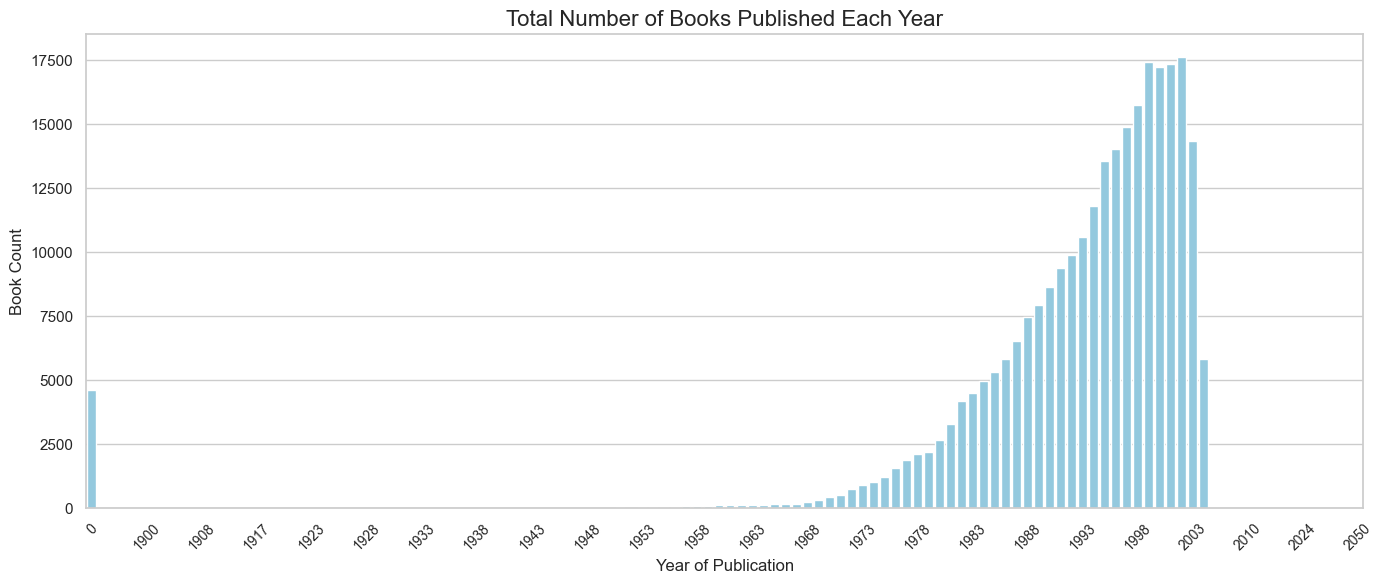

In [52]:
# Total number of books published each year
plt.figure(figsize=(14, 6)) # Creating a figure with a specified size (14x6)
sns.barplot(
    data=yearly_book_count, # Dataframe containing the yearly book counts
    x='Year of Publication', # x-axis represents the year of publication
    y='Book Count', # y-axis represents the total number of books
    color='skyblue' # Bar color is set to sky blue
)
# Customizing x-axis ticks -> Showing every 5th year as a label for readability
year_ticks = yearly_book_count['Year of Publication'][::5]
plt.xticks(
    ticks=range(0, len(yearly_book_count), 5), # Setting tick positions at every 5th index
    labels=year_ticks, # Using the corresponding years for the labels
    rotation=45, # Rotating x-axis labels by 45 degrees for better visibility
    fontsize=10 # Font size is set to 10 for x-axis labels
)
# Setting plot title and axis labels, adjusting layout to prevent label clipping
plt.title('Total Number of Books Published Each Year', fontsize=16)
plt.xlabel('Year of Publication', fontsize=12)
plt.ylabel('Book Count', fontsize=12)
plt.tight_layout()
# Displaying the plot
plt.show()

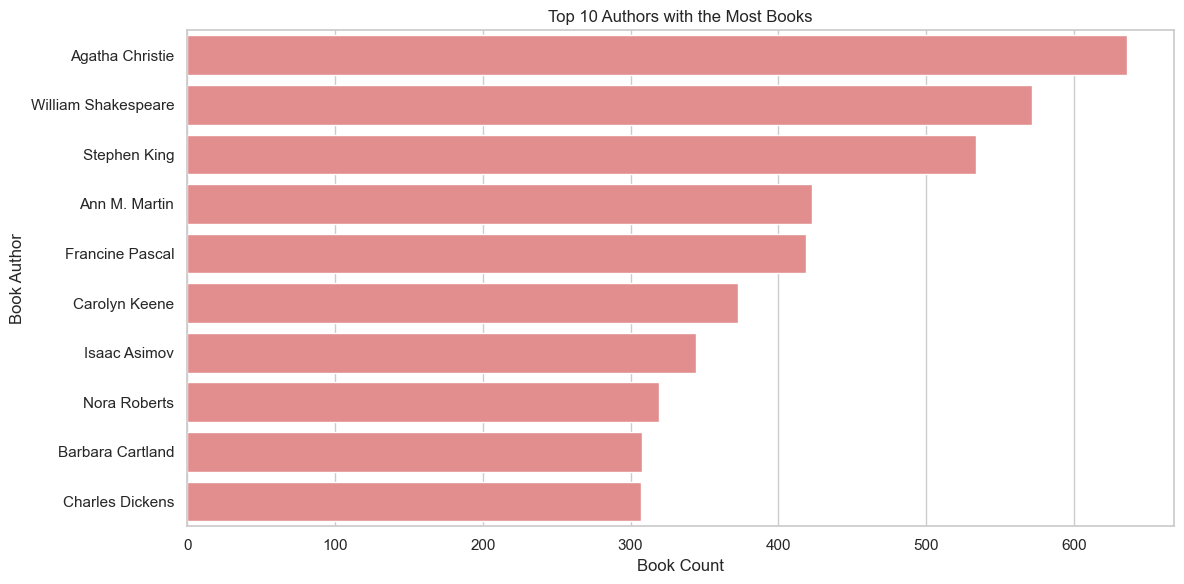

In [53]:
# Top 10 authors with the most books
top_authors = books['Book Author'].value_counts().head(10).reset_index() # Get the top 10 authors based on book count
top_authors.columns = ['Book Author', 'Book Count'] # Renaming columns for clarity
# Bar plot to visualize the top 10 authors and their book counts
plt.figure(figsize=(12, 6)) # Creating a figure with a specified size (12x6)
sns.barplot(data=top_authors, x='Book Count', y='Book Author', color='lightcoral')  # Bar color is light coral
# Setting plot title and axis labels
plt.title('Top 10 Authors with the Most Books')
plt.xlabel('Book Count')
plt.ylabel('Book Author')
# Adjusting layout for optimal spacing
plt.tight_layout()
# Displaying the plot
plt.show()

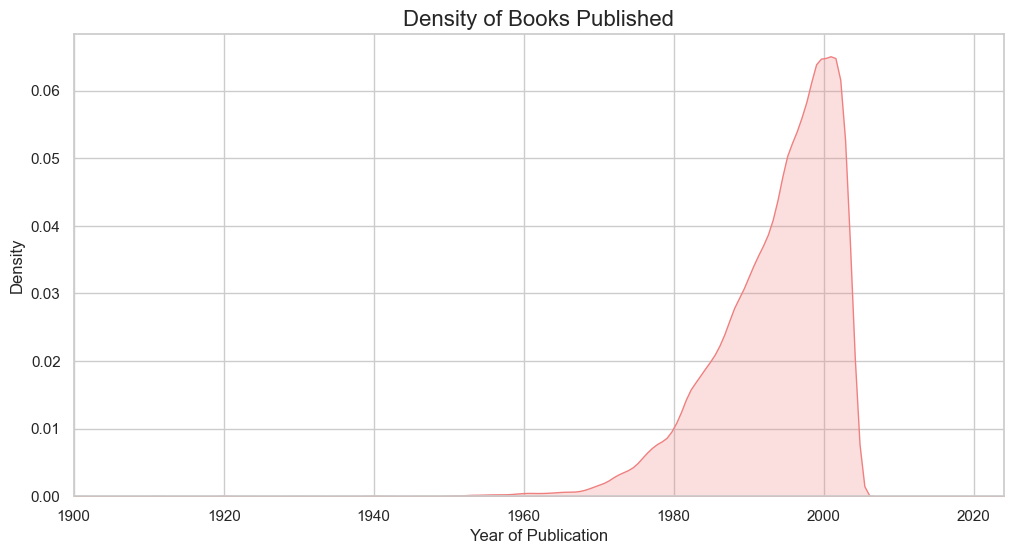

In [54]:
## Distribution of books published per year 
# Filtering data to consider only books published between 1900 and 2024
books_ar = books[(books['Year of Publication'] >= 1900) & (books['Year of Publication'] <= 2024)]
# Density plot to visualize the distribution of books published over the years
plt.figure(figsize=(12, 6))
sns.kdeplot(data=books_ar, x='Year of Publication', fill=True, color='lightcoral') 
# Setting limits for the x-axis from 1900 to 2024
plt.xlim(1900, 2024)
plt.title('Density of Books Published', fontsize=16)
plt.xlabel('Year of Publication', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.show()

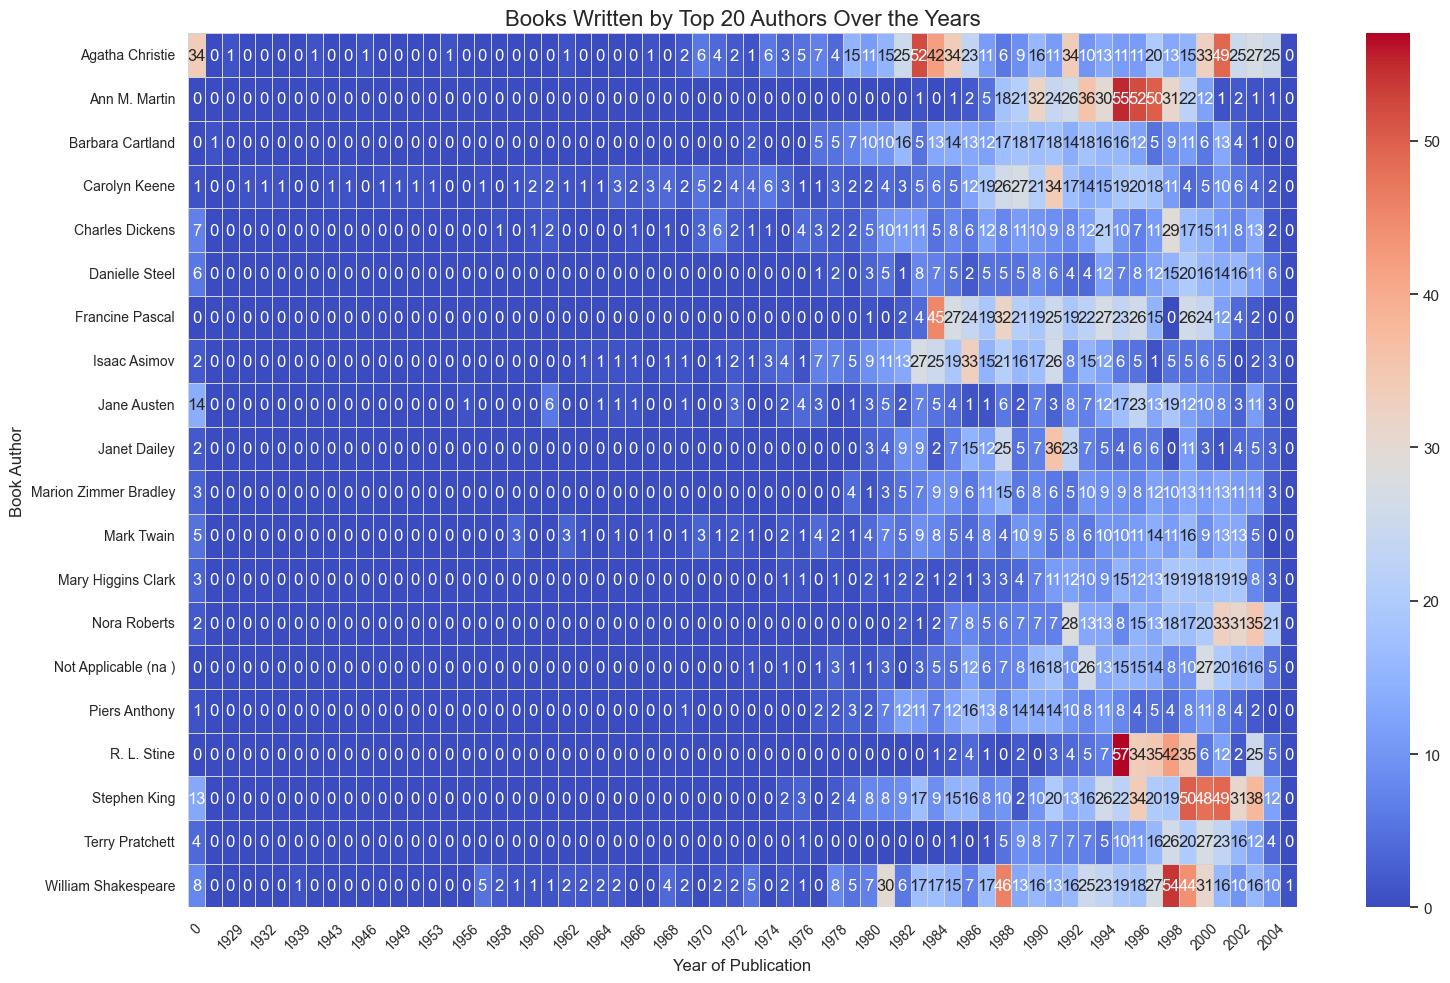

In [55]:
## Heatmap of books written by the top 20 authors over the years
# The top 20 authors based on total book count
top_20authors = author_year_books.groupby('Book Author')['Book Count'].sum().nlargest(20).index
# Filtering the dataset to include only the top 20 authors
filtered_data = author_year_books[author_year_books['Book Author'].isin(top_20authors)]
# Pivot the data (viewing it from a different perspective) to create a matrix for the heatmap (Book Author vs. Year of Publication)
pivot_data = filtered_data.pivot(index='Book Author', columns='Year of Publication', values='Book Count').fillna(0)
# Creating the heatmap plot
plt.figure(figsize=(16, 10))  
sns.heatmap(
    pivot_data, # Data for the heatmap
    cmap='coolwarm', # Colormap for heatmap visualization
    cbar=True, # Showing the color bar to indicate the values
    linewidths=0.5, # The width of lines between cells
    linecolor='lightgray', # The color of the grid lines
    annot=True, # The numeric value in each cell
    fmt='.0f' # Format the annotations as integers (no decimals)
)
# Set plot title and axis labels
plt.title('Books Written by Top 20 Authors Over the Years', fontsize=16)
plt.xlabel('Year of Publication', fontsize=12)
plt.ylabel('Book Author', fontsize=12)
plt.xticks(rotation=45, fontsize=10)  
plt.yticks(fontsize=10)               
plt.tight_layout()
plt.show()

In [56]:
# Filepath for the ratings dataset
ratings_filepath = '/Users/archits/Downloads/BX-Book-Ratings.csv'

In [57]:
# Reading and loading the ratings dataset
ratings = pd.read_csv(
    ratings_filepath,
    encoding="latin-1",
    on_bad_lines='skip',
    nrows = 10000 # Limiting the no. of rows to load to the first 10,000 rows 
)

In [58]:
# Displaying initial data types of the ratings dataset
print("Initial data types:")
print(ratings.dtypes)

Initial data types:
user_id     int64
isbn       object
rating      int64
dtype: object


In [59]:
# Displaying the first few rows of the ratings dataset
print("\nFirst few rows of the dataset:")
print(ratings.head())


First few rows of the dataset:
   user_id        isbn  rating
0   276725  034545104X       0
1   276726   155061224       5
2   276727   446520802       0
3   276729  052165615X       3
4   276729   521795028       6


In [60]:
# Conversion columns to the appropriate types
ratings['user_id'] = ratings['user_id'].astype('Int64') 
ratings['isbn'] = ratings['isbn'].astype('string')  
ratings['rating'] = pd.to_numeric(ratings['rating'], errors='coerce').fillna(0).astype(float)  

In [61]:
# Displaying data types of the ratings dataset after updating
print("Initial data types:")
print(ratings.dtypes)

Initial data types:
user_id             Int64
isbn       string[python]
rating            float64
dtype: object


In [62]:
# Displaying the first few rows after updating
print("\nFirst few rows of the dataset:")
print(ratings.head())


First few rows of the dataset:
   user_id        isbn  rating
0   276725  034545104X     0.0
1   276726   155061224     5.0
2   276727   446520802     0.0
3   276729  052165615X     3.0
4   276729   521795028     6.0


In [63]:
# Displaying ratings dataset 
ratings

,user_id,isbn,rating
0,276725,034545104X,0.0
1,276726,155061224,5.0
2,276727,446520802,0.0
3,276729,052165615X,3.0
4,276729,521795028,6.0
...,...,...,...
9995,243,425164403,0.0
9996,243,440224764,0.0
9997,243,440225701,0.0
9998,243,440226430,0.0


In [64]:
# Function to rename columns dynamically
def rename_columns(columns):
    renamed_columns = []
    for col in columns:
        new_col = col.replace('_', ' ')
        words = new_col.split()
        for i, word in enumerate(words):
            # Capitalize first/last word 
            if i == 0 or i == len(words) - 1 or word.lower():
                words[i] = word.capitalize()
            else:
                words[i] = word.lower()
        new_col = ' '.join(words)
        # Special case for ISBN
        if 'isbn' in col.lower():
            new_col = 'ISBN'
        renamed_columns.append(new_col)
    return renamed_columns

In [65]:
# Apply the renaming function to the columns
ratings.columns = rename_columns(ratings.columns)

In [66]:
# Displaying updated column names
print("\nUpdated column names:")
print(ratings.columns)


Updated column names:
Index(['User Id', 'ISBN', 'Rating'], dtype='object')


In [67]:
# ratings dataset after updating
ratings

,User Id,ISBN,Rating
0,276725,034545104X,0.0
1,276726,155061224,5.0
2,276727,446520802,0.0
3,276729,052165615X,3.0
4,276729,521795028,6.0
...,...,...,...
9995,243,425164403,0.0
9996,243,440224764,0.0
9997,243,440225701,0.0
9998,243,440226430,0.0


In [68]:
# Checking for NULL values in Users datasets
print("Users Dataset Null Values:")
print(users.isnull().sum())

Users Dataset Null Values:
User Id     1
Location    1
Age         0
dtype: int64


In [69]:
# Handling missing 'User Id' - Replacing NaN with 'Unknown User'
users['User Id'] = users['User Id'].fillna(-1).astype('Int64')
# Handling missing 'Location' - Imputing with the most frequent location 
if users['Location'].isnull().any():
    most_frequent_location = users['Location'].mode()[0]  
    users['Location'] = users['Location'].fillna(most_frequent_location)
# Handling missing 'Age' - Replacing 0 with the median age and fill NaN with median
if (users['Age'] == 0).any() or users['Age'].isnull().any():
    median_age = users['Age'].median()
    users['Age'] = users['Age'].replace(0, median_age)  
    users['Age'] = users['Age'].fillna(median_age)

In [70]:
# Number of remaining missing values 
print("Remaining Nulls in Dataset:")
print(users.isnull().sum())

Remaining Nulls in Dataset:
User Id     0
Location    0
Age         0
dtype: int64


In [71]:
# Checking for NULL values in Books datasets
print("\nBooks Dataset Null Values:")
print(books.isnull().sum())


Books Dataset Null Values:
ISBN                   0
Book Title             0
Book Author            2
Year of Publication    0
Publisher              2
dtype: int64


In [72]:
# Handling missing 'Book Author' - Replacing NaN with 'Unknown Author' as a placeholder
books['Book Author'] = books['Book Author'].fillna('Unknown Author')
# Handling missing 'Publisher' - Replacing NaN with 'Unknown Publisher' as a placeholder
books['Publisher'] = books['Publisher'].fillna('Unknown Publisher')

In [73]:
# Number of missing values after handling them
print("Books Dataset Null Values After Handling:")
print(books.isnull().sum())

Books Dataset Null Values After Handling:
ISBN                   0
Book Title             0
Book Author            0
Year of Publication    0
Publisher              0
dtype: int64


In [74]:
# Checking for NULL values in Ratings datasets
print("\nRatings Dataset Null Values:")
print(ratings.isnull().sum())


Ratings Dataset Null Values:
User Id    0
ISBN       0
Rating     0
dtype: int64


In [75]:
# Merging the datasets based on USER ID
ratings_with_users = pd.merge(
    ratings, 
    users, 
    on='User Id', 
    how='inner' # only the rows that have matching 'User Id' in both datasets will be kept
) 
# Merging the datasets base on ISBN
full_data = pd.merge(
    ratings_with_users, 
    books, 
    on='ISBN', 
    how='inner' # only the rows that have matching 'ISBN' in both datasets will be kept
) 

In [76]:
# Displaying merged ratings and users datasets
ratings_with_users

,User Id,ISBN,Rating,Location,Age
0,276725,034545104X,0.0,"Tyler, Texas, USA",22
1,276726,155061224,5.0,"Seattle, Washington, USA",22
2,276727,446520802,0.0,"H, New South Wales, Australia",16
3,276729,052165615X,3.0,"Rijeka, N/A, Croatia",16
4,276729,521795028,6.0,"Rijeka, N/A, Croatia",16
...,...,...,...,...,...
9995,243,425164403,0.0,"Arden Hills, Minnesota, USA",22
9996,243,440224764,0.0,"Arden Hills, Minnesota, USA",22
9997,243,440225701,0.0,"Arden Hills, Minnesota, USA",22
9998,243,440226430,0.0,"Arden Hills, Minnesota, USA",22


In [77]:
# Displaying all merged datasets
full_data

,User Id,ISBN,Rating,Location,Age,Book Title,Book Author,Year of Publication,Publisher
0,276725,034545104X,0.0,"Tyler, Texas, USA",22,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
1,276726,155061224,5.0,"Seattle, Washington, USA",22,Rites of Passage,Judith Rae,2001,Heinle
2,276727,446520802,0.0,"H, New South Wales, Australia",16,The Notebook,Nicholas Sparks,1996,Warner Books
3,276729,052165615X,3.0,"Rijeka, N/A, Croatia",16,Help!: Level 1,Philip Prowse,1999,Cambridge University Press
4,276729,521795028,6.0,"Rijeka, N/A, Croatia",16,The Amsterdam Connection : Level 4 (cambridge ...,Sue Leather,2001,Cambridge University Press
...,...,...,...,...,...,...,...,...,...
8696,243,425164403,0.0,"Arden Hills, Minnesota, USA",22,Only Love (magical Love),Erich Segal,1998,Berkley Publishing Group
8697,243,440224764,0.0,"Arden Hills, Minnesota, USA",22,The Partner,John Grisham,1998,Dell Publishing Company
8698,243,440225701,0.0,"Arden Hills, Minnesota, USA",22,The Street Lawyer,John Grisham,1999,Dell
8699,243,440226430,0.0,"Arden Hills, Minnesota, USA",22,Summer Sisters,Judy Blume,1999,Dell Publishing Company


In [78]:
# Unique Values in users DataFrame
## Check no. of unique values
print("Unique User Ids:", users['User Id'].nunique()) 
print("Unique Locations:", users['Location'].nunique()) 
print("Unique Ages:", users['Age'].nunique())  
## Displaying unique values for each column
print("Unique User Ids:", users['User Id'].unique())
print("Unique Locations:", users['Location'].unique())
print("Unique Ages:", users['Age'].unique())

Unique User Ids: 278859
Unique Locations: 57183
Unique Ages: 164
Unique User Ids: <IntegerArray>
[     1,      2,      3,      4,      5,      6,      7,      8,      9,
     10,
 ...
 278849, 278850, 278851, 278852, 278853, 278854, 278855, 278856, 278857,
 278858]
Length: 278859, dtype: Int64
Unique Locations: ['NYC, New York, USA' 'Stockton, California, USA'
 'Moscow, Yukon Territory, Russia' ... 'Sergnano, Lombardia, Italy'
 'Stranraer, N/A, United Kingdom' 'Tacoma, Washington, United Kingdom']
Unique Ages: <IntegerArray>
[ 22,  18,  17,  61,  26,  14,  25,  19,  46,  55,
 ...
 107, 157, 111, 146, 118, 220, 143, 140, 189, 127]
Length: 164, dtype: Int64


In [79]:
# Unique Values in books DataFrame
## Check no. of unique values
print("Unique ISBNs:", books['ISBN'].nunique()) 
print("Unique Book Titles:", books['Book Title'].nunique())  
print("Unique Book Authors:", books['Book Author'].nunique())  
print("Unique Years of Publication:", books['Year of Publication'].nunique())  
# Displaying unique values for each column
print("Unique ISBNs:", books['ISBN'].unique())
print("Unique Book Titles:", books['Book Title'].unique())
print("Unique Book Authors:", books['Book Author'].unique())
print("Unique Years of Publication:", books['Year of Publication'].unique())

Unique ISBNs: 271379
Unique Book Titles: 238930
Unique Book Authors: 98954
Unique Years of Publication: 116
Unique ISBNs: <StringArray>
[ '195153448',    '2005018',   '60973129',  '374157065',  '393045218',
  '399135782',  '425176428',  '671870432',  '679425608', '074322678X',
 ...
  '762412119', '1582380805', '1845170423', '014002803X',  '449906736',
  '440400988',  '525447644', '006008667X',  '192126040',  '767409752']
Length: 271379, dtype: string
Unique Book Titles: ['Classical Mythology' 'Clara Callan' 'Decision in Normandy' ...
 'Lily Dale : The True Story of The Town That Talks to The Dead'
 "Republic (world's Classics)"
 "A Guided Tour of Rene Descartes' Meditations on First Philosophy with Complete Translations of The Meditations by Ronald Rubin"]
Unique Book Authors: ['Mark P. O. Morford' 'Richard Bruce Wright' "Carlo D'este" ...
 'Allen M., Ph.d. Young' 'David Biggs' 'Teri Sloat']
Unique Years of Publication: [2002 2001 1991 1999 2000 1993 1996 1988 2004 1998 1994 2003 1997 

In [80]:
# Unique Values in ratings DataFrame
## Check no. of unique values
print("Unique User Ids in Ratings:", ratings['User Id'].nunique())  
print("Unique ISBNs in Ratings:", ratings['ISBN'].nunique()) 
print("Unique Ratings:", ratings['Rating'].nunique())
## Displaying unique values for each column
print("Unique User Ids in Ratings:", ratings['User Id'].unique())
print("Unique ISBNs in Ratings:", ratings['ISBN'].unique())
print("Unique Ratings:", ratings['Rating'].unique())

Unique User Ids in Ratings: 941
Unique ISBNs in Ratings: 9335
Unique Ratings: 11
Unique User Ids in Ratings: <IntegerArray>
[276725, 276726, 276727, 276729, 276733, 276736, 276737, 276744, 276745,
 276746,
 ...
    226,    228,    230,    232,    233,    236,    237,    241,    242,
    243]
Length: 941, dtype: Int64
Unique ISBNs in Ratings: <StringArray>
['034545104X',  '155061224',  '446520802', '052165615X',  '521795028',
 '2080674722', '3257224281',  '600570967', '038550120X',  '342310538',
 ...
  '375705856',  '380754509',  '380807866',  '385316895',  '385509456',
  '385720106',  '425092917',  '425098834',  '425163407',  '425164403']
Length: 9335, dtype: string
Unique Ratings: [ 0.  5.  3.  6.  8.  7. 10.  9.  4.  1.  2.]


In [81]:
# Unique Values in full_data DataFrame
## Check no. of unique values in the merged dataset 'full_data'
print("Unique User Ids in Merged Data:", full_data['User Id'].nunique()) 
print("Unique Book Titles in Merged Data:", full_data['Book Title'].nunique())  
print("Unique Book Authors in Merged Data:", full_data['Book Author'].nunique())  
print("Unique Ratings in Merged Data:", full_data['Rating'].nunique())  
print("Unique Years of Publication in Merged Data:", full_data['Year of Publication'].nunique())  
# Displaying unique values for each column
print("Unique User Ids in Merged Data:", full_data['User Id'].unique())
print("Unique Book Titles in Merged Data:", full_data['Book Title'].unique())
print("Unique Book Authors in Merged Data:", full_data['Book Author'].unique())
print("Unique Ratings in Merged Data:", full_data['Rating'].unique())
print("Unique Years of Publication in Merged Data:", full_data['Year of Publication'].unique())

Unique User Ids in Merged Data: 828
Unique Book Titles in Merged Data: 7836
Unique Book Authors in Merged Data: 4727
Unique Ratings in Merged Data: 11
Unique Years of Publication in Merged Data: 58
Unique User Ids in Merged Data: <IntegerArray>
[276725, 276726, 276727, 276729, 276733, 276744, 276746, 276747, 276748,
 276751,
 ...
    224,    226,    228,    230,    232,    236,    237,    241,    242,
    243]
Length: 828, dtype: Int64
Unique Book Titles in Merged Data: ['Flesh Tones: A Novel' 'Rites of Passage' 'The Notebook' ...
 'If Morning Ever Comes' 'Unnatural Exposure' 'Only Love (magical Love)']
Unique Book Authors in Merged Data: ['M. J. Rose' 'Judith Rae' 'Nicholas Sparks' ... 'Lorna Landvik'
 'Kent Haruf' 'Mark Haddon']
Unique Ratings in Merged Data: [ 0.  5.  3.  6.  7.  9.  8. 10.  1.  4.  2.]
Unique Years of Publication in Merged Data: [2002 2001 1996 1999 1998 1994 1995 2003 1997 2024 1992 1983 2000    0
 1989 1991 1993 1976 1990 1982 1988 1981 1986 1987 1980 2004 1984 1

In [82]:
# Importing necessary libraries from sklearn for model building and evaluation
from sklearn.model_selection import train_test_split # For splitting data into training and test sets
from sklearn.preprocessing import StandardScaler # For scaling the features to standardize them
from sklearn.linear_model import LinearRegression # For Linear Regression model
from sklearn.metrics import mean_squared_error # For calculating Mean Squared Error (MSE)

In [83]:
# Feature selection 
## Selecting the independent variables and dependent variable
X = full_data[['Age', 'Year of Publication']]  
y = full_data['Rating']
# Train-test split
## Splitting the dataset into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(f"Train Features: {X_train.shape}, Test Features: {X_test.shape}")
print(f"Train Target: {y_train.shape}, Test Target: {y_test.shape}")

Train Features: (6090, 2), Test Features: (2611, 2)
Train Target: (6090,), Test Target: (2611,)


In [84]:
# Feature Scaling
# Scaling the features to standardize them using StandardScaler -> it is important for distance-based algorithms like K-NN, SVM
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) # Fit and transform the training data
X_test_scaled = scaler.transform(X_test) # Only transform the test data using the fitted scaler

In [85]:
# Linear Regression 
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
# Predictions
lr_pred = lr_model.predict(X_test_scaled)
lr_mse = mean_squared_error(y_test, lr_pred)
# Evaluations
print(f"Linear Regression MSE: {lr_mse}")

Linear Regression MSE: 11.40198141186047


In [86]:
# Importing Ridge and Lasso models for regularization and GridSearchCV for hyperparameter tuning
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV

In [87]:
# Ridge Regression with GridSearch for alpha tuning
ridge_model = Ridge()
ridge_params = {'alpha': [0.1, 1.0, 10.0, 100.0]}  # Trying different values of alpha for regularization strength
ridge_grid = GridSearchCV(ridge_model, ridge_params, cv=5) # 5-fold cross-validation to evaluate the model
ridge_grid.fit(X_train_scaled, y_train) # Fitting the Ridge model to the scaled training data
# Predictions
ridge_pred = ridge_grid.predict(X_test_scaled)
ridge_mse = mean_squared_error(y_test, ridge_pred)
# Evaluations
print(f"Ridge Regression MSE: {ridge_mse}, Best alpha: {ridge_grid.best_params_}")

Ridge Regression MSE: 11.401796828330856, Best alpha: {'alpha': 100.0}


In [88]:
# Lasso Regression with GridSearch for alpha tuning
lasso_model = Lasso()
lasso_params = {'alpha': [0.1, 0.5, 1.0, 10.0]} 
lasso_grid = GridSearchCV(lasso_model, lasso_params, cv=5)
lasso_grid.fit(X_train_scaled, y_train) # Fitting the Lasso model to the scaled training data
# Predictions
lasso_pred = lasso_grid.predict(X_test_scaled)
lasso_mse = mean_squared_error(y_test, lasso_pred)
# Evaluations
print(f"Lasso Regression MSE: {lasso_mse}, Best alpha: {lasso_grid.best_params_}")

Lasso Regression MSE: 11.414247201204018, Best alpha: {'alpha': 0.1}


In [89]:
# Importing library for Polynomial Regression
from sklearn.preprocessing import PolynomialFeatures

In [90]:
# Polynomial Regression (degree = 2 for quadratic features)
# Transform the features into polynomial features 
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_scaled) # Transforming the training data
X_test_poly = poly.transform(X_test_scaled) # Transforming the test data based on training set
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)
# Predictions
poly_pred = poly_model.predict(X_test_poly)
poly_mse = mean_squared_error(y_test, poly_pred)
# Evaluations
print(f"Polynomial Regression MSE (degree=2): {poly_mse}")

Polynomial Regression MSE (degree=2): 11.103486304942624


In [91]:
# Importing library for binary classification and evaluation metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [92]:
# Binary classification based on Rating (classify as 1 if Rating >= 8, else 0)
full_data['Rating_Class'] = (full_data['Rating'] >= 8).astype(int)
X = full_data[['Age', 'Year of Publication']]
y = full_data['Rating_Class']
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [93]:
# Random Forest Classifier model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train) # Fit the model on the training data
# Predictions
y_pred = rf_model.predict(X_test)
# Evaluation
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8640367675220222
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.98      0.93      2245
           1       0.55      0.18      0.27       366

    accuracy                           0.86      2611
   macro avg       0.71      0.58      0.60      2611
weighted avg       0.83      0.86      0.83      2611



In [94]:
# Importing SMOTE (Synthetic Minority Over-sampling Technique) for handling imbalanced data
from imblearn.over_sampling import SMOTE

In [95]:
# Recreate the Rating_Class feature for classification
full_data['Rating_Class'] = (full_data['Rating'] >= 8).astype(int)
X = full_data[['Age', 'Year of Publication']]
y = full_data['Rating_Class']
X = X.astype(float)
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
y_train = y_train.astype(int)
# Oversampling the minority class using SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [96]:
# Training a Random Forest Classifier model on the resampled training data
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_resampled, y_train_resampled)
# Predictions
y_pred = rf_model.predict(X_test)
# Evaluation
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.7828418230563002
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.84      0.87      2245
           1       0.31      0.43      0.36       366

    accuracy                           0.78      2611
   macro avg       0.60      0.64      0.61      2611
weighted avg       0.82      0.78      0.80      2611



In [97]:
# Importing KMeans for clustering
from sklearn.cluster import KMeans

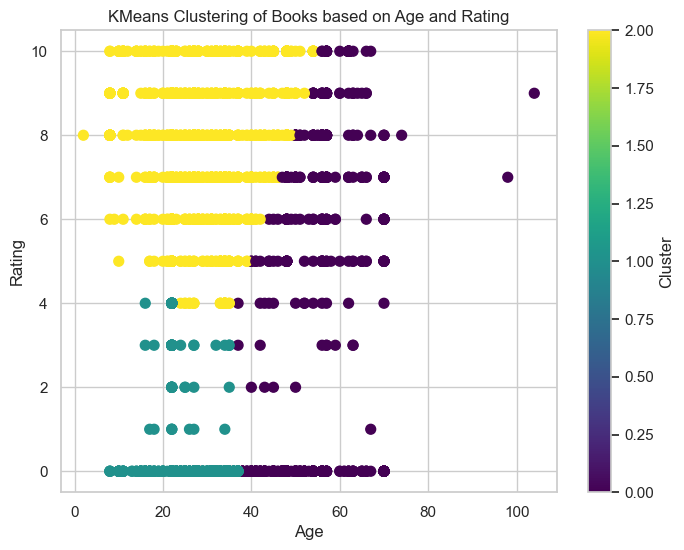

   Age  Rating  Cluster
0   22     0.0      1.0
1   22     5.0      2.0
2   16     0.0      1.0
3   16     3.0      1.0
4   16     6.0      2.0


In [98]:
# Clustering features
X_clustering = full_data[['Age', 'Rating']].dropna()
# Standardizing the features before applying KMeans
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_clustering)
# K-Means clustering (set to 3 clusters)
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled) # Fit the KMeans model and predict clusters
# Assigning the clusters back to the original data
full_data.loc[X_clustering.index, 'Cluster'] = clusters
# Visualizing the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_clustering['Age'], X_clustering['Rating'], c=clusters, cmap='viridis', marker='o', s=50)
plt.title('KMeans Clustering of Books based on Age and Rating')
plt.xlabel('Age')
plt.ylabel('Rating')
plt.colorbar(label='Cluster')
plt.show()
# Display the first few rows of the data with clusters
print(full_data[['Age', 'Rating', 'Cluster']].head())

In [99]:
# Importing PCA (Principal Component Analysis) for dimensionality reduction and visualization
from sklearn.decomposition import PCA

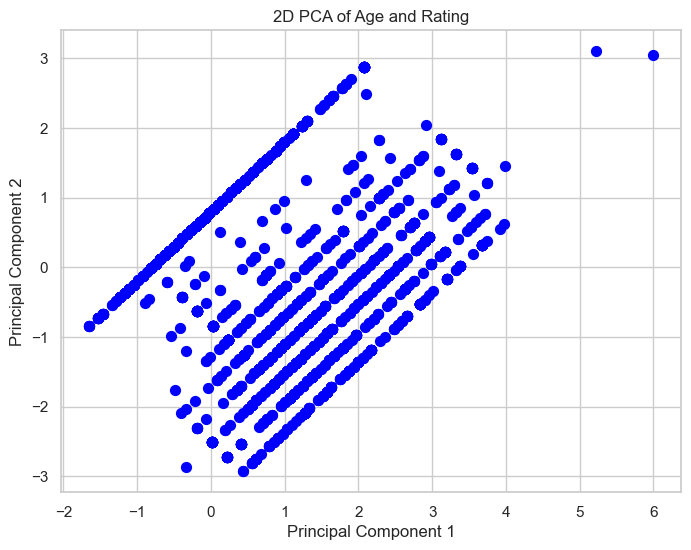

Explained Variance Ratio: [0.58764645 0.41235355]


In [100]:
# PCA for 2D visualization
X_clustering = full_data[['Age', 'Rating']].dropna()
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_clustering)
# Apply PCA to reduce the features to 2 principal components
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_scaled)
# Visualizing the 2D PCA projection
plt.figure(figsize=(8, 6))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c='blue', marker='o', s=50)
plt.title('2D PCA of Age and Rating')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()
print(f"Explained Variance Ratio: {pca.explained_variance_ratio_}")

In [101]:
##### Memory-based Collaborative Filtering -> method used for recommendations sysytem which has ratings, views, etc.

In [102]:
# Merging the ratings and books dataset on 'ISBN' to have user-item interactions along with book details
r_wid_b = pd.merge(ratings, books, on='ISBN')
r_wid_b

,User Id,ISBN,Rating,Book Title,Book Author,Year of Publication,Publisher
0,276725,034545104X,0.0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
1,276726,155061224,5.0,Rites of Passage,Judith Rae,2001,Heinle
2,276727,446520802,0.0,The Notebook,Nicholas Sparks,1996,Warner Books
3,276729,052165615X,3.0,Help!: Level 1,Philip Prowse,1999,Cambridge University Press
4,276729,521795028,6.0,The Amsterdam Connection : Level 4 (cambridge ...,Sue Leather,2001,Cambridge University Press
...,...,...,...,...,...,...,...
8696,243,425164403,0.0,Only Love (magical Love),Erich Segal,1998,Berkley Publishing Group
8697,243,440224764,0.0,The Partner,John Grisham,1998,Dell Publishing Company
8698,243,440225701,0.0,The Street Lawyer,John Grisham,1999,Dell
8699,243,440226430,0.0,Summer Sisters,Judy Blume,1999,Dell Publishing Company


In [103]:
# Checking the number of unique users and books in the merged dataset
n_users = r_wid_b['User Id'].nunique()
n_books = r_wid_b['ISBN'].nunique()
print('Num. of Users: ' + str(n_users))
print('Num. of Books: ' + str(n_books))

Num. of Users: 828
Num. of Books: 8051


In [104]:
# Converting ISBN var and User Id var and to numeric type for indexing
isbn_list = r_wid_b['ISBN'].unique()
userid_list = r_wid_b['User Id'].unique()
# Function to map ISBN to a numeric ID based on its position in the ISBN list
def get_isbn_numeric_id(isbn):
    itemindex = np.where(isbn_list==isbn)
    return itemindex[0][0]
# Function to map User Id to a numeric ID based on its position in the user ID list
def get_user_id_numeric_id(user_id):
    #print ("  isbn is:" , isbn)
    itemindex = np.where(userid_list==user_id)
    return itemindex[0][0]
print(" Length of ISBN List:", len(isbn_list))
print(" Length of User Id List:", len(userid_list))

 Length of ISBN List: 8051
 Length of User Id List: 828


In [105]:
# Convert both user_id and isbn to ordered list i.e. from 0...n-1
r_wid_b['user_id_order'] = r_wid_b['User Id'].apply(get_user_id_numeric_id)
r_wid_b['isbn_id'] = r_wid_b['ISBN'].apply(get_isbn_numeric_id)
r_wid_b.head()

,User Id,ISBN,Rating,Book Title,Book Author,Year of Publication,Publisher,user_id_order,isbn_id
0,276725,034545104X,0.0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,0,0
1,276726,155061224,5.0,Rites of Passage,Judith Rae,2001,Heinle,1,1
2,276727,446520802,0.0,The Notebook,Nicholas Sparks,1996,Warner Books,2,2
3,276729,052165615X,3.0,Help!: Level 1,Philip Prowse,1999,Cambridge University Press,3,3
4,276729,521795028,6.0,The Amsterdam Connection : Level 4 (cambridge ...,Sue Leather,2001,Cambridge University Press,3,4


In [106]:
# Re-indexing the columns to a specific order
new_col_order = ['user_id_order', 'isbn_id', 'Rating', 'Book Title', 'Book Author','Year of Publication','Publisher','ISBN','User Id']
r_wid_b = r_wid_b.reindex(columns= new_col_order)
r_wid_b.head()

,user_id_order,isbn_id,Rating,Book Title,Book Author,Year of Publication,Publisher,ISBN,User Id
0,0,0,0.0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,034545104X,276725
1,1,1,5.0,Rites of Passage,Judith Rae,2001,Heinle,155061224,276726
2,2,2,0.0,The Notebook,Nicholas Sparks,1996,Warner Books,446520802,276727
3,3,3,3.0,Help!: Level 1,Philip Prowse,1999,Cambridge University Press,052165615X,276729
4,3,4,6.0,The Amsterdam Connection : Level 4 (cambridge ...,Sue Leather,2001,Cambridge University Press,521795028,276729


In [107]:
# Split the data into train and test sets
train_set, test_set = train_test_split(r_wid_b, test_size=0.3, random_state=42)

In [108]:
## Constructing the user-item matrix for training
user_book_matrix_train = np.zeros((n_users, n_books))
for row in train_set.itertuples():
    user_book_matrix_train[row.user_id_order, row.isbn_id] = row.Rating
## Constructing the user-item matrix for testing
user_book_matrix_test = np.zeros((n_users, n_books))
for row in test_set.itertuples():
    user_book_matrix_test[row.user_id_order, row.isbn_id] = row.Rating

In [109]:
# Pearson Correlation function to compute user-user similarity
def pearson_correlation(matrix):
    # Mean-center the ratings (subtract mean ratings per user)
    user_means = np.true_divide(
        matrix.sum(axis=1), 
        (matrix != 0).sum(axis=1), 
        out=np.zeros_like(matrix.sum(axis=1)), 
        where=(matrix != 0).sum(axis=1) > 0
    )
    ratings_diff = matrix - user_means[:, np.newaxis]
    ratings_diff[matrix == 0] = 0  # Ignore zeros
    # Compute the covariance matrix (dot product of ratings differences)
    covariance = np.dot(ratings_diff, ratings_diff.T)
    norms = np.sqrt(np.diag(covariance))
    # Prevent division by zero by replacing zero norms with a small value
    norms[norms == 0] = 1e-8  # Small value to avoid division by zero
    similarity = covariance / np.outer(norms, norms)
    # Handle NaN values and ensure no self-similarity (diagonal is 0)
    similarity = np.nan_to_num(similarity, nan=0)
    np.fill_diagonal(similarity, 0)
    return similarity

In [110]:
# Importing necessary functions for similarity calculation
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.preprocessing import MinMaxScaler

In [111]:
# Adjusted Cosine Similarity for item-item similarity
def adjusted_cosine_similarity(matrix):
    # Computing user means for normalization (column-wise)
    user_means = np.true_divide(
        matrix.sum(axis=0), 
        (matrix != 0).sum(axis=0), 
        out=np.zeros_like(matrix.sum(axis=0)), 
        where=(matrix != 0).sum(axis=0) > 0
    )
    # Subtracting user means to center the data (adjusted matrix)
    adjusted_matrix = matrix - user_means[np.newaxis, :]
    adjusted_matrix[matrix == 0] = 0  # Ignore zero ratings
    # Computing cosine similarity between items (columns of the adjusted matrix)
    similarity = 1 - pairwise_distances(adjusted_matrix.T, metric='cosine')
    np.nan_to_num(similarity, copy=False)  # Replace NaN with 0
    np.fill_diagonal(similarity, 0)  # No self-similarity
    return similarity

In [112]:
# Scaling the similarity matrix to the range [0, 1]
def scale_similarity(similarity_matrix):
    # Normalize similarity values to the range [0, 1]
    min_val = np.min(similarity_matrix)
    max_val = np.max(similarity_matrix)
    if max_val - min_val > 0:  # Avoid division by zero
        scaled_matrix = (similarity_matrix - min_val) / (max_val - min_val)
    else:
        scaled_matrix = similarity_matrix
    return scaled_matrix

In [113]:
# Computing similarity matrices for user-user and item-item similarities
user_similarity_matrix = pearson_correlation(user_book_matrix_train)
item_similarity_matrix = adjusted_cosine_similarity(user_book_matrix_train)
# Print a summary to validate the user-user similarity matrix
print(f"User-User Similarity Matrix (Summary):")
print(f"Max Value: {np.max(user_similarity_matrix)}")
print(f"Min Value: {np.min(user_similarity_matrix)}")
print(f"Non-Zero Elements: {np.count_nonzero(user_similarity_matrix)}")
# Computing the data sparsity (percentage of non-zero ratings)
sparsity = np.count_nonzero(user_book_matrix_train) / user_book_matrix_train.size
print(f"Data Sparsity: {sparsity * 100:.2f}%")
# Scaling the similarity matrices to normalize the similarity values
user_similarity_matrix = scale_similarity(user_similarity_matrix)
item_similarity_matrix = scale_similarity(item_similarity_matrix)
# Print scaled similarity matrices for verification
print("Scaled User-User Similarity Matrix:\n", user_similarity_matrix)
print("Scaled Item-Item Similarity Matrix:\n", item_similarity_matrix)

User-User Similarity Matrix (Summary):
Max Value: 0.2335496832484569
Min Value: -0.4999999999999999
Non-Zero Elements: 74
Data Sparsity: 0.02%
Scaled User-User Similarity Matrix:
 [[0.68161709 0.68161709 0.68161709 ... 0.68161709 0.68161709 0.68161709]
 [0.68161709 0.68161709 0.68161709 ... 0.68161709 0.68161709 0.68161709]
 [0.68161709 0.68161709 0.68161709 ... 0.68161709 0.68161709 0.68161709]
 ...
 [0.68161709 0.68161709 0.68161709 ... 0.68161709 0.68161709 0.68161709]
 [0.68161709 0.68161709 0.68161709 ... 0.68161709 0.68161709 0.68161709]
 [0.68161709 0.68161709 0.68161709 ... 0.68161709 0.68161709 0.68161709]]
Scaled Item-Item Similarity Matrix:
 [[0.33333333 0.33333333 0.33333333 ... 0.33333333 0.33333333 0.33333333]
 [0.33333333 0.33333333 0.33333333 ... 0.33333333 0.33333333 0.33333333]
 [0.33333333 0.33333333 0.33333333 ... 0.33333333 0.33333333 0.33333333]
 ...
 [0.33333333 0.33333333 0.33333333 ... 0.33333333 0.33333333 0.33333333]
 [0.33333333 0.33333333 0.33333333 ... 0.3

In [114]:
# Function to generate predictions based on similarity (user-based or item-based)
def generate_predictions(ratings, similarity, kind='user'):
    epsilon = 1e-8  # Small value to avoid division by zero
    if kind == 'user':
        weighted_sum = similarity.dot(ratings)  # Dot product for user-based CF
        similarity_sums = np.abs(similarity).sum(axis=1)[:, np.newaxis] + epsilon
        predictions = weighted_sum / similarity_sums
    elif kind == 'item':
        weighted_sum = ratings.dot(similarity)  # Dot product for item-based CF
        similarity_sums = np.abs(similarity).sum(axis=0) + epsilon
        predictions = weighted_sum / similarity_sums
    return predictions

In [115]:
# Generate predictions using user-based and item-based collaborative filtering
user_based_predictions = generate_predictions(user_book_matrix_train, user_similarity_matrix, kind='user')
item_based_predictions = generate_predictions(user_book_matrix_train, item_similarity_matrix, kind='item')

In [116]:
user_based_predictions
item_based_predictions

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.00062104, 0.00062104, 0.00062104, ..., 0.00062104, 0.00062104,
        0.00062104],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.01478077, 0.01478077, 0.01478077, ..., 0.01478077, 0.01478077,
        0.01478077],
       [0.00683145, 0.00683145, 0.00683145, ..., 0.00683145, 0.00683145,
        0.00683145]])

In [117]:
# Importing sqrt for calculating RMSE (Root Mean Squared Error)
from math import sqrt

In [118]:
# Function to calculate RMSE for evaluation
def calculate_rmse(predictions, actuals):
    # Find non-zero indices (actual ratings)
    non_zero_idx = actuals.nonzero()
    predicted_vals = predictions[non_zero_idx].flatten()
    actual_vals = actuals[non_zero_idx].flatten()
    return sqrt(mean_squared_error(predicted_vals, actual_vals))

In [119]:
# Print Print RMSE values for both user-based and item-based collaborative filtering -> Evaluating performance
print('User-Based CF RMSE:', calculate_rmse(user_based_predictions, user_book_matrix_test))
print('Item-Based CF RMSE:', calculate_rmse(item_based_predictions, user_book_matrix_test))

User-Based CF RMSE: 7.800170412133659
Item-Based CF RMSE: 7.783244421747591


In [121]:
# Save cleaned datasets to CSV files
users_cleaned_path = '/Users/archits/Downloads/cleaned_datasets/cleaned_users.csv'
ratings_cleaned_path = '/Users/archits/Downloads/cleaned_datasets/cleaned_ratings.csv'
books_cleaned_path = '/Users/archits/Downloads/cleaned_datasets/cleaned_books.csv'
# Save cleaned dataframes
users.to_csv(users_cleaned_path, index=False)
ratings.to_csv(ratings_cleaned_path, index=False)
books.to_csv(books_cleaned_path, index=False)
print(f"Saved cleaned datasets to: {users_cleaned_path}, {ratings_cleaned_path}, {books_cleaned_path}")

Saved cleaned datasets to: /Users/archits/Downloads/cleaned_datasets/cleaned_users.csv, /Users/archits/Downloads/cleaned_datasets/cleaned_ratings.csv, /Users/archits/Downloads/cleaned_datasets/cleaned_books.csv
